In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

from matplotlib import font_manager

font_dirs = ['style/fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.style.use('default')
plt.style.use('style/style.mplstyle')


In [2]:
df = pd.read_csv('../data/fuoriuscita/utenti_1522/Tipologia utenti - sesso, nazionalità, regione (2013-2022).csv')
df = df[["Territorio","TIPUTENZA2","Tipologia di utenza","SEXISTAT1","ISO","Nazionalità","TIME","Value"]]
df.head()

,Territorio,TIPUTENZA2,Tipologia di utenza,SEXISTAT1,ISO,Nazionalità,TIME,Value
0,Italia,ALL_VAL,chiamate valide,M,NRP,Non Indicato,2013,216
1,Italia,ALL_VAL,chiamate valide,M,NRP,Non Indicato,2014,58
2,Italia,ALL_VAL,chiamate valide,M,NRP,Non Indicato,2018,1
3,Italia,OPERATORS,da operatori,M,NRP,Non Indicato,2013,19
4,Italia,OPERATORS,da operatori,M,NRP,Non Indicato,2014,5


In [3]:
df_valide = df[(df["TIPUTENZA2"] == "ALL_VAL") & (df["ISO"] == "IT") & (df["Territorio"] == "Italia") & (df["SEXISTAT1"] != "NRP")]
df_valide

,Territorio,TIPUTENZA2,Tipologia di utenza,SEXISTAT1,ISO,Nazionalità,TIME,Value
628,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2013,2647
629,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2014,2626
630,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2015,2128
631,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2016,1622
632,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2017,2047
633,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2018,2481
634,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2019,2276
635,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2020,3290
636,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2021,3889
637,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2022,3729


In [4]:
df_maschi = df_valide[df_valide["SEXISTAT1"] == "M"]
df_femmine = df_valide[df_valide["SEXISTAT1"] == "F"]
df_maschi

,Territorio,TIPUTENZA2,Tipologia di utenza,SEXISTAT1,ISO,Nazionalità,TIME,Value
628,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2013,2647
629,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2014,2626
630,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2015,2128
631,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2016,1622
632,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2017,2047
633,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2018,2481
634,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2019,2276
635,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2020,3290
636,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2021,3889
637,Italia,ALL_VAL,chiamate valide,M,IT,Italia,2022,3729


4083.45


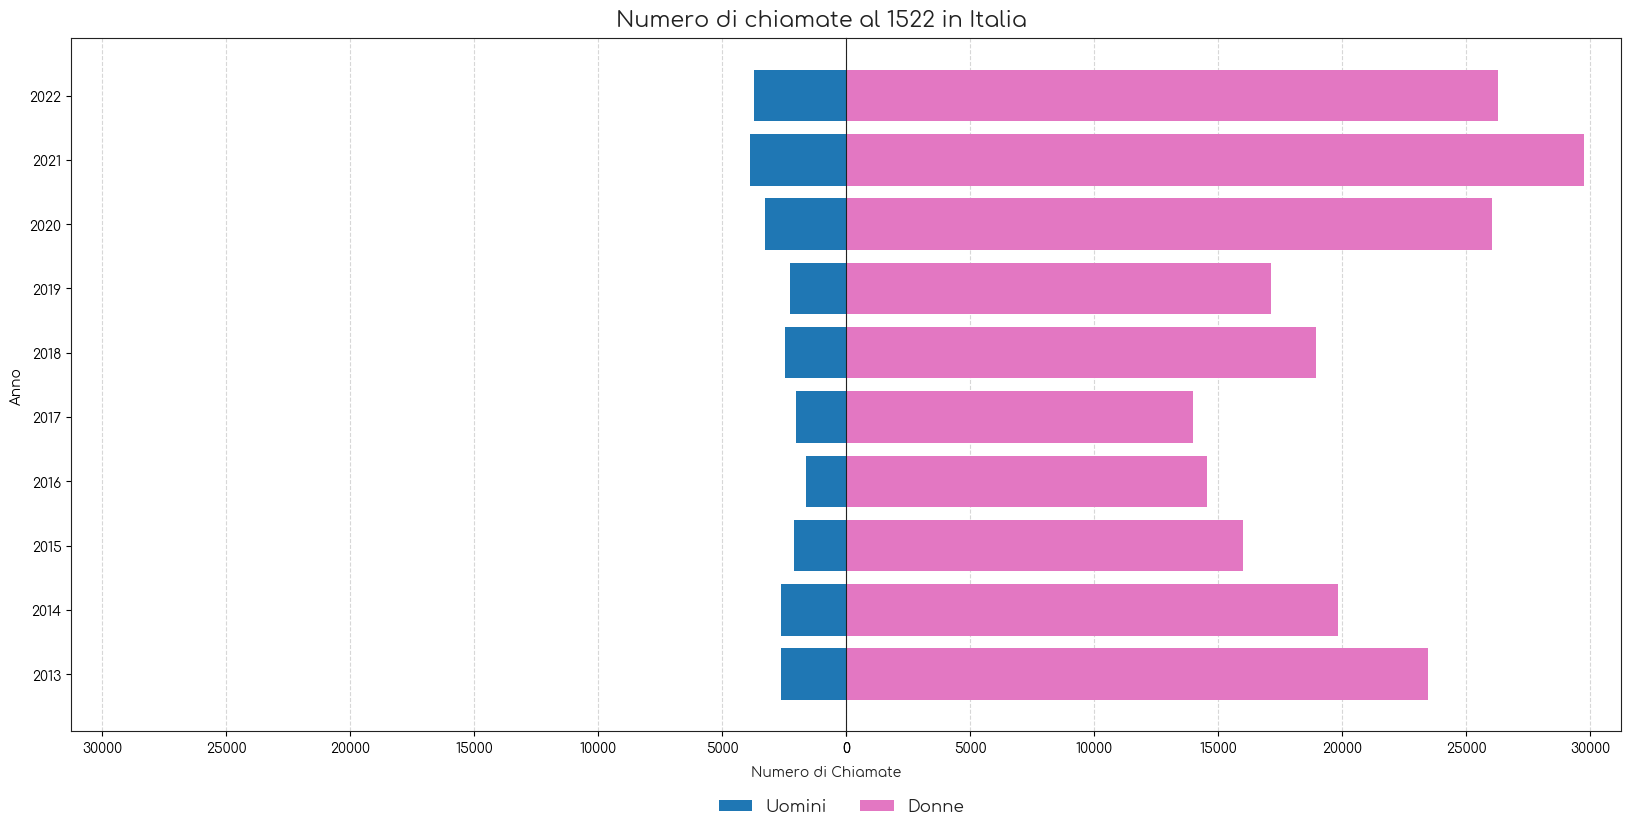

In [24]:
fig, (ax1, ax2) = plt.subplots(
        figsize=(20,9),
        nrows=1,
        ncols=2,
        subplot_kw={'yticks': []}
    )

females_palette = ["#F7DEE5", "#EEC1D2", "#D791B5", "#C4679B", "#AC4187", "#7D275C", "#481437"]
males_palette = ["#CADBE2", "#9CBCCE", "#6694AB", "#357091", "#1E587F", "#193F57", "#0B1D27"]

ax1.barh(y=df_maschi["TIME"].astype(str), width=df_maschi["Value"], color='C0', label="Uomini") #2b8cbe #045A8D #156291 #46BBBD
ax2.barh(y=df_femmine["TIME"].astype(str), width=df_femmine["Value"], color='C6', label="Donne") #dd1c77 #CB318F #BC4699
ax1.invert_xaxis()

x_max = max(ax1.get_xlim()[0], ax2.get_xlim()[1])
print(ax1.get_xlim()[0])
ax1.set_xlim((x_max, 0))
ax2.set_xlim((0, x_max))

ax1.spines['left'].set_visible(True)
ax1.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['top'].set_visible(True)

ax1.set_yticks(np.arange(len(df_maschi)))
ax1.set_ylabel("Anno")

fig.subplots_adjust(wspace=0)
ax1.xaxis.grid('on')
ax2.grid('on')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels,
           ncol=2,
           loc='lower center',
           bbox_to_anchor=(0.51,0),
           shadow=False,
           frameon=False,
           fontsize=12)

plt.suptitle("Numero di chiamate al 1522 in Italia", fontsize=16, y=0.9125)
fig.text(0.465, 0.06, "Numero di Chiamate")
plt.show()